<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
 

<strong>Objectives:</strong>
+ Estudiar los missings en la variable uds venta
+ Discernir ceros (no venta) de verdaderos missings (datos faltantes)
    
    
<strong>Conclusions:</strong>
+ Hay datos faltantes correspondientes a los días 23, 24, 25 y 26
+ El resto no nos queda otra que considerarlos venta 0.
+ Hay 7 de 50 festivos con ventas, de momento se decide pasar esas ventas al día anterior.

   
</div>

In [1]:
import os, sys

def get_root_path(search_word):
    """ Búsqueda hacia atrás de un directorio con nombre search_word. """
    cwd = os.getcwd()
    while str(os.getcwd()).split('/')[-1] != search_word:
        os.chdir("..")
        cwd = os.getcwd()
    return cwd

ROOT_DIR = get_root_path('TFM_StockForecast')

sys.path.insert(0, ROOT_DIR) # Poner en el primer lugar del PATH (evitar paquetes con mismos nombres en otros directorios)

In [2]:
import pandas as pd

In [4]:
# PRINT EDA FOR STOCK DATA
df = pd.read_csv("data/clean/stock_all.csv")

variable = "udsprevisionempresa"

df.head()

,fecha,producto,udsstock,udsventa,udsprevisionempresa,promo,festivo,weekday
0,2019-06-05,1,18275.0,2833.0,102304.0,0.0,0.0,2
1,2019-06-05,10,2267.0,1874.0,36888.0,1.0,0.0,2
2,2019-06-05,11,2506.0,2755.0,31078.0,0.0,0.0,2
3,2019-06-05,12,1279.0,1161.0,33661.0,0.0,0.0,2
4,2019-06-05,13,2493.0,1603.0,32119.0,1.0,0.0,2


In [5]:
def filter_festivos(indf, only):
    df = indf.copy()
    if only:
        df = df.loc[(df.festivo == 1) | (df.weekday == 6)]
    else: 
        df = df.loc[(df.festivo != 1) & (df.weekday != 6)]
    return df
def perc(df1, df2):
    return round(100* df1.shape[0]/df2.shape[0])

In [6]:
# Declarar todos los df de estudio:

# ventas_byprod
ventas_byprod = pd.read_csv("data/clean/ventas_byprod.csv")


# df con registros con valores, con 0s y missings
exist = df.loc[~df[variable].isna()]
miss = df.loc[df[variable].isna()]
zeros = df.loc[df[variable] == 0]

# Missings sin contar las vacaciones
miss_noholiday = filter_festivos(miss, False)

# Missings por producto
byprod = miss_noholiday.groupby("producto")['fecha'].count().reset_index().sort_values("fecha", ascending=False)
byprod.columns = ["producto", "num_missings"]

# Missings por fecha
bydate = miss_noholiday.groupby("fecha")['producto'].count().reset_index().sort_values("producto", ascending=False)
bydate.columns = ["fecha", "num_missings"]

# Missings por dia de la semana
byday = miss.groupby("weekday")['producto'].count().reset_index().sort_values("producto", ascending=False)
byday.columns = ["weekday", "num_missings"]

# Analisis previo

In [7]:
print("Registros totales en dataset: {} ".format(df.shape[0]))
print("Productos totales: {} ".format(len(df.producto.unique())))
print("Días totales: {} ".format(len(df.fecha.unique())))
print("Dias totales de vacaciones: {} ".format(len(filter_festivos(df, True).fecha.unique())))

Registros totales en dataset: 24272 
Productos totales: 82 
Días totales: 296 
Dias totales de vacaciones: 50 


# Datos existentes en dias de vacaciones (festivos y domingos)

In [8]:
print("  Valores existentes en dias de vacaciones: {}"\
                .format(filter_festivos(exist, True).shape[0]))

print("  Dias de vacaciones con datos: {}"\
                .format(len(filter_festivos(exist, True).fecha.unique())))

filter_festivos(exist, True).fecha.unique()

  Valores existentes en dias de vacaciones: 1064
  Dias de vacaciones con datos: 43


array(['2019-06-09', '2019-06-16', '2019-06-23', '2019-06-30',
       '2019-07-07', '2019-07-14', '2019-07-28', '2019-08-11',
       '2019-08-15', '2019-08-18', '2019-08-25', '2019-09-08',
       '2019-09-15', '2019-09-22', '2019-09-29', '2019-10-06',
       '2019-10-12', '2019-10-13', '2019-10-20', '2019-10-27',
       '2019-11-01', '2019-11-03', '2019-11-10', '2019-11-17',
       '2019-11-24', '2019-12-01', '2019-12-06', '2019-12-08',
       '2019-12-09', '2019-12-15', '2019-12-22', '2019-12-25',
       '2019-12-29', '2020-01-01', '2020-01-05', '2020-01-06',
       '2020-01-12', '2020-02-02', '2020-02-09', '2020-02-16',
       '2020-02-23', '2020-03-01', '2020-03-08'], dtype=object)

In [9]:
print("Dias festivos con datos:")
filter_festivos(exist, True).groupby("fecha")['producto'].count()

Dias festivos con datos:


fecha
2019-06-09    13
2019-06-16     7
2019-06-23     8
2019-06-30     7
2019-07-07     6
2019-07-14     5
2019-07-28    10
2019-08-11     9
2019-08-15    78
2019-08-18     9
2019-08-25     9
2019-09-08    11
2019-09-15    10
2019-09-22    22
2019-09-29    20
2019-10-06    22
2019-10-12    42
2019-10-13    25
2019-10-20    31
2019-10-27    20
2019-11-01    79
2019-11-03    20
2019-11-10    19
2019-11-17    12
2019-11-24     6
2019-12-01    14
2019-12-06    77
2019-12-08    14
2019-12-09    77
2019-12-15    16
2019-12-22    16
2019-12-25    77
2019-12-29    16
2020-01-01    77
2020-01-05    31
2020-01-06    78
2020-01-12    28
2020-02-02     3
2020-02-09     8
2020-02-16     8
2020-02-23     8
2020-03-01     8
2020-03-08     8
Name: producto, dtype: int64

¿Porqué tienen datos estos festivos?

# Datos perdidos en el total y sin contar las vacaciones

In [10]:
print("  Valores missings in udsventa:                                                              {} ({}%)"\
                .format(miss.shape[0], perc(miss, df)))

print("  Valores con ceros in udsventa:                                                             {} ({}%)"\
                .format(zeros.shape[0], perc(zeros, df)))

print("  Valores missings in udsventa sin domingos y festivos:                                      {} ({}%)"\
                .format(miss_noholiday.shape[0], perc(miss_noholiday, df)))

print("  Valores missings in udsventa sin domingos y festivos y con datos anteriores al 2020-03-23: {} ({}%)"\
                .format(miss_noholiday.loc[miss_noholiday.fecha < '2020-03-23'].shape[0], perc(miss_noholiday, df)))

  Valores missings in udsventa:                                                              6430 (26%)
  Valores con ceros in udsventa:                                                             268 (1%)
  Valores missings in udsventa sin domingos y festivos:                                      3394 (14%)
  Valores missings in udsventa sin domingos y festivos y con datos anteriores al 2020-03-23: 3352 (14%)


In [11]:
zeros

,fecha,producto,udsstock,udsventa,udsprevisionempresa,promo,festivo,weekday
313,2019-06-08,80,NaN,NaN,0.0,0.0,0.0,5
348,2019-06-09,3,NaN,NaN,0.0,1.0,0.0,6
795,2019-06-14,70,NaN,NaN,0.0,0.0,0.0,4
877,2019-06-15,70,NaN,NaN,0.0,0.0,0.0,5
887,2019-06-15,80,NaN,1476.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...
23963,2020-03-23,29,NaN,NaN,0.0,0.0,0.0,0
24021,2020-03-23,95,NaN,NaN,0.0,0.0,0.0,0
24045,2020-03-24,29,NaN,NaN,0.0,0.0,0.0,1
24127,2020-03-25,29,NaN,NaN,0.0,0.0,0.0,2


# Datos perdidos por producto

In [12]:
print("   Missings en udsventa sin domingos y festivos para {} productos de {} totales."\
                .format(byprod.loc[byprod.num_missings != 0].shape[0], byprod.shape[0]))
print("   5 productos con más missings:")
byprod.head()

   Missings en udsventa sin domingos y festivos para 82 productos de 82 totales.
   5 productos con más missings:


,producto,num_missings
5,7,210
58,70,191
35,44,152
77,95,127
44,54,126


In [92]:
list(ventas_byprod.loc[ventas_byprod.fecha_ultima_venta < '2020-01-01', ['producto', 'fecha_primera_venta', 'fecha_ultima_venta']]\
.sort_values("fecha_ultima_venta").producto)

[7, 44, 82, 54, 71, 76]

In [13]:
ventas_byprod.loc[ventas_byprod.fecha_ultima_venta < '2020-01-01', ['producto', 'fecha_primera_venta', 'fecha_ultima_venta']].sort_values("fecha_ultima_venta")

,producto,fecha_primera_venta,fecha_ultima_venta
58,7,2015-06-29,2019-06-21
34,44,2015-06-29,2019-11-05
71,82,2015-06-29,2019-11-29
44,54,2015-06-29,2019-12-23
60,71,2015-06-29,2019-12-24
65,76,2016-11-02,2019-12-26


# Datos perdidos por fecha

In [14]:
print("   Missings en udsventa sin domingos y festivos para {} fechas de {} totales."\
                .format(bydate.loc[bydate.num_missings != 0].shape[0], bydate.shape[0]))
print("Dias sin ningun dato (de los no festivos):")
bydate.loc[bydate.num_missings == 82].sort_values("fecha")

   Missings en udsventa sin domingos y festivos para 221 fechas de 221 totales.
Dias sin ningun dato (de los no festivos):


,fecha,num_missings
4,2019-07-03,82
14,2019-07-20,82
22,2019-07-30,82
23,2019-07-31,82
24,2019-08-01,82
25,2019-08-02,82
26,2019-08-03,82
27,2019-08-05,82
28,2019-08-06,82
29,2019-08-07,82


#### Los missings del 23 al 26 de marzo de 2020 son missings reales, los de verano es posible que no haya ventas.

In [15]:
print("   5 fechas con más missings (sin que sean todos):")
bydate.loc[bydate.num_missings != 82].head()

   5 fechas con más missings (sin que sean todos):


,fecha,num_missings
5,2019-07-04,77
50,2019-09-02,74
15,2019-07-22,53
13,2019-07-19,46
216,2020-03-21,40


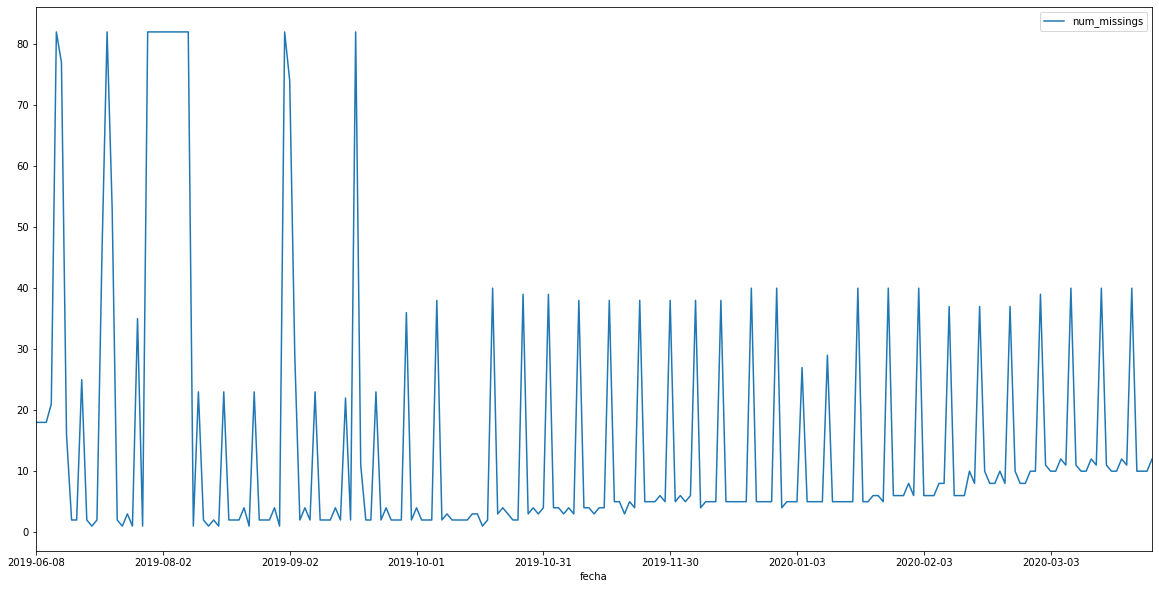

In [16]:
bydate.sort_values("fecha").set_index("fecha").plot(figsize=(20,10))

# Missings por dia de la semana (contando festivos)

In [17]:
byday.sort_values("weekday")

,weekday,num_missings
0,0,371
1,1,442
2,2,413
3,3,438
4,4,281
5,5,1520
6,6,2965
